In [216]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [217]:
data = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [243]:
data.dtypes

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [219]:
X = data.drop(columns=["customer_id", "default"])
Y= data["default"]  

In [220]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2, stratify=Y)

In [221]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [222]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [223]:
y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]

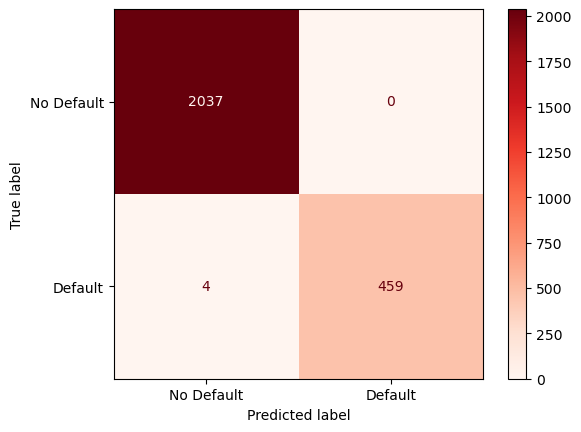

In [224]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(x_test_scaled)
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])
disp.plot(cmap="Reds")
plt.show()

In [241]:
def predict_expected_loss(credit_lines_outstanding, loan_amt_outstanding, total_debt_outstanding, income, years_employed, fico_score):
    new_borrower = pd.DataFrame([[credit_lines_outstanding, loan_amt_outstanding, total_debt_outstanding, income, years_employed, fico_score]], columns=X.columns)    
    new_borrower_scaled = scaler.transform(new_borrower)
    new_borrower_scaled= pd.DataFrame(new_borrower_scaled, columns= X.columns)
    pd_value = model.predict_proba(new_borrower_scaled)[:, 1][0]
    
    recovery_rate = 0.10
    expected_loss = pd_value * loan_amt_outstanding * (1 - recovery_rate)
    
    return pd_value, expected_loss

credit_lines_outstanding = int(input("Enter the credit lines outstanding:"))
loan_amt_outstanding= float(input("Enter the loan amount outstanding:"))
total_debt_outstanding = float(input("Enter the total debt outstanding:"))
income = float(input("Enter the income:"))
years_employed= int(input("Enter the years employed:"))
fico_score = int(input("Enter the fico score:"))
pd_value, expected_loss = predict_expected_loss(credit_lines_outstanding, loan_amt_outstanding, total_debt_outstanding, income, years_employed
                                                , fico_score)

print(f"Probability of Default: {pd_value:.4f}")
print(f"Expected Loss: ${expected_loss:.2f}")


Enter the credit lines outstanding: 3
Enter the loan amount outstanding: 15000
Enter the total debt outstanding: 22000
Enter the income: 85000
Enter the years employed: 7
Enter the fico score: 650


Probability of Default: 0.0301
Expected Loss: $406.11


In [ ]:
3	15000.00	22000.00	85000.00	7	650	0